In [1]:
"""Working through the 'Mini-Course' from MachineLearningMastery: https://machinelearningmastery.com/imbalanced-classification-with-python-7-day-mini-course/
Q: What is an imbalanced classification problem and why do we care? 
A: A classification problem where the classes are not split evenly is an imbalanced classification problem. The issue with
   problems like this is that a generic model will suffer from poor performance due to the data imbalance. These problems 
   will be pretty common, like a fraudulent credit card model, where 1/100,000 transactions is fraudulent. 
This notebook will cover all lessons:
Lesson 01: Challenge of Imbalanced Classification
Lesson 02: Intuition for Imbalanced Data
Lesson 03: Evaluate Imbalanced Classification Models
Lesson 04: Undersampling the Majority Class
Lesson 05: Oversampling the Minority Class
Lesson 06: Combine Data Undersampling and Oversampling
Lesson 07: Cost-Sensitive Algorithms
"""

In [ ]:
#Lesson 01: Challenge of Imbalanced Classification
"""Examples for Imbalanced Classification:
1. Fraudulent Credit Card Transaction Detection
2. Genetic Screening
3. Mechanical Breakdown Prediction 
4. Anything related to Churn possibly
5. Webpage Ad Analytics
6. Diabetes screening
"""

Counter({0: 900, 1: 100})


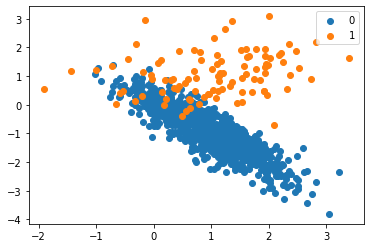

In [4]:
#Lesson 02: Intuition for Imbalanced Data
"""Below we will create some generic classification dataset with sklearns make_classification.
Class 1: 90% Class 2: 10%, so highly imbalanced. We will then plot with pyplot to visualize."""
# plot imbalanced classification problem
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.90, 0.10], flip_y=0)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [11]:
#Lesson 03: Evaluate Imbalanced Classification Models
"""We will answer the question of how to evaluate these models. The typical evaluation metric is accuracy, which is a foolish
metric for these kinds of problems as labeling everything as class 1 and yield high accuracy, proportional the the skew.
Now what about Precision/Recall? Maximizing precision will minimize the false positives, and maximizing recall will minimize 
false negatives. Both of these are useful, so we will use both. Introducing the F-score. Where:
F-score = (2 * Precision * Recall) / (Precision + Recall)
The F-measure is calculated as the harmonic mean of precision and recall, giving each the same weighting, so it's a good place 
to start, let's do an example."""

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# generate dataset like above
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.90], flip_y=0)

# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, stratify=y)

# define some arbitrary model
model = LogisticRegression(solver='liblinear')

# fit model
model.fit(trainX, trainy)

# predict on test set
yhat = model.predict(testX)

# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))

"""As we can see that accuracy was probably great, but since the weighting is 90% class 1, how much of a model is this? Could be as 
simple as input value = class 1, and it would still be right 90% of the time. Let's look at another scoring metric:
Fbeta-measure: https://machinelearningmastery.com/fbeta-measure-for-machine-learning/
The Fbeta-measure skews the weighting of the average between precision and recall. The "beta" is a constant for skewing the weight 
of the score between favoring precision (beta<1), favoring recall (beta>1). A beta = 1 is just the regular f-score.
"""

from sklearn.metrics import fbeta_score
print('Fbeta-measure(beta=1): %.3f' % fbeta_score(testy, yhat, beta=1))
print('Fbeta-measure(beta=0.5): %.3f' % fbeta_score(testy, yhat, beta=0.5))
print('Fbeta-measure(beta=2): %.3f' % fbeta_score(testy, yhat, beta=2))


Accuracy: 0.992
Precision: 0.991
Recall: 0.926
F-measure: 0.958
Fbeta-measure(beta=1): 0.958
Fbeta-measure(beta=0.5): 0.978
Fbeta-measure(beta=2): 0.938


In [4]:
#Lesson 04: Undersampling the Majority Class
"""One option to solve this issue is to resample the data to get a better distribution. There is a library "imbalanced-learn".
"""
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99, 0.01], flip_y=0)

# summarize class distribution
print(Counter(y))

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=0.5)

# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)

# summarize class distribution
print(Counter(y_under))

# re-do the model from above
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

trainX, testX, trainy, testy = train_test_split(X_under, y_under, test_size=0.5, stratify=y_under)
model = LogisticRegression(solver='liblinear')
model.fit(trainX, trainy)
yhat = model.predict(testX)

print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))

Counter({0: 9900, 1: 100})
Counter({0: 200, 1: 100})
Accuracy: 0.993
Precision: 1.000
Recall: 0.980
F-measure: 0.990


In [6]:
#Lesson 05: Oversampling the Minority Class
"""And as no surprise another option is to do the opposite, and oversample the minority class. We will look at 
Synthetic Minority Oversampling Technique (SMOTE). This does a little more than duplicating the minority class, it does so with 
tiny variations in values, using k-nearest clustering."""

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99, 0.01], flip_y=0)

# summarize class distribution
print(Counter(y))

# define oversample strategy
oversample = SMOTE(sampling_strategy=0.5)

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

# summarize class distribution
print(Counter(y_over))

# re-do the model from above
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

trainX, testX, trainy, testy = train_test_split(X_over, y_over, test_size=0.5, stratify=y_over)
model = LogisticRegression(solver='liblinear')
model.fit(trainX, trainy)
yhat = model.predict(testX)

print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 4950})
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F-measure: 1.000


In [8]:
#Lesson 06: Combine Data Undersampling and Oversampling
"""Naturally the next step is to find use for both of these processes. There are a few techniques:
* Random Undersampling with SMOTE oversampling.
* Tomek Links Undersampling with SMOTE oversampling.
* Edited Nearest Neighbors Undersampling with SMOTE oversampling.
The below example will use the SMOTEENN class to perform over-sampling using SMOTE and cleaning using ENN."""

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTEENN
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99, 0.01], flip_y=0)
# summarize class distribution
print(Counter(y))
# define sampling strategy
sample = SMOTEENN(sampling_strategy=0.5)
# fit and apply the transform
X_smoteenn, y_smoteenn = sample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_smoteenn))

# re-do the model from above
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

trainX, testX, trainy, testy = train_test_split(X_smoteenn, y_smoteenn, test_size=0.5, stratify=y_smoteenn)
model = LogisticRegression(solver='liblinear')
model.fit(trainX, trainy)
yhat = model.predict(testX)

print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 4950})
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F-measure: 1.000


In [9]:
#Lesson 07: Cost-Sensitive Algorithms
"""Cost-sensitive learning is a subfield of machine learning that takes the costs of prediction errors 
(and potentially other costs) into account when training a machine learning model. A highly relevant example
is Covid-19 testing, where the cost of a false negative is far higher than a false positive. Cost-sensitive 
techniques may be divided into three groups: 
* Data resampling 
* Algorithm modifications
* Ensemble methods.
I didn't think the "lesson" gave enough detail, so may do an additional book concerning Cost-sensitive Algos.
But below we will look at the class_weight attribute in the sk-learn algorthm LogisticRegression. Weights 
associated with classes are in the form {class_label: weight}, or 'balanced'.
"""
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0)
# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, stratify=y)
# define model
model = LogisticRegression(solver='liblinear', class_weight='balanced')
# fit model
model.fit(trainX, trainy)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print('F-Measure: %.3f' % f1_score(testy, yhat))

F-Measure: 0.239
